In [1]:
#pip install texthero

In [2]:
import numpy as np
import pandas as pd
import os
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

from nltk.tokenize import sent_tokenize, word_tokenize 
import warnings

import gensim 
from gensim.models import Word2Vec
from gensim.parsing.preprocessing import STOPWORDS

from sklearn.feature_extraction.text import TfidfVectorizer

import matplotlib.pyplot as plt

import texthero as hero
from texthero import preprocessing

In [3]:
myPath = os.getcwd()
myPath

'/Users/hannaoconnor/Desktop/school/Spring 2021/text as data'

In [4]:
compiledText = []

# read the txt file containing all of the sonnets into a list
for file in os.listdir(os.path.join(myPath, 'sonnet analysis')):
    if file == 'sonnets.txt':
        compiledText.append(open(os.path.join(myPath, 'sonnet analysis', file), encoding='utf-8').read())

In [5]:
picsList = []

# a list for images, currently there's only one, but I'm leaving it as a list in case I want to add more images
for pic in os.listdir(os.path.join(myPath, 'sonnet analysis')):
    if pic == "shakes.jpg":
        picsList.append(pic)

In [6]:
# each sonnet is separated by two new line escape characters, so each element in this list will be a complete sonnet.
sonnetText = []
sonnetText = compiledText[0].split('\n\n')

In [7]:
# since the sonnets are just named by numbers, I created an iterative list to be as long as the length of the sonnetText list
# each element is a number converted into a string
sonnetNames = []

for num in range(1,len(sonnetText)+1):
    sonnetNames.append(str(num))

In [8]:
# creates a data frame with the given lists

df = pd.DataFrame({"File names": sonnetNames, "Full text": sonnetText})
pd.options.display.max_colwidth = 130

df

File names  \
0            1   
1            2   
2            3   
3            4   
4            5   
..         ...   
149        150   
150        151   
151        152   
152        153   
153        154   

                                                                                                                             Full text  
0    From fairest creatures we desire increase, That thereby beauty’s rose might never die, But, as the riper should by time deceas...  
1    When forty winters shall besiege thy brow And dig deep trenches in thy beauty’s field, Thy youth’s proud livery, so gazed on n...  
2    Look in thy glass and tell the face thou viewest Now is the time that face should form another, Whose fresh repair if now thou...  
3    Unthrifty loveliness, why dost thou spend Upon thyself thy beauty’s legacy? Nature’s bequest gives nothing but doth lend, And ...  
4    Those hours that with gentle work did frame The lovely gaze where every eye doth dwell Will play the tyrants to the very same ...  
..                                                                                                                                 ...  
149  O, from what power hast thou this powerful might With insufficiency my heart to sway? To make me give the lie to my true sight...  
150  Love is too young to know what conscience is; Yet who knows not conscience is born of love? Then, gentle cheater, urge not my ...  
151  In loving thee thou know'st I am forsworn, But thou art twice forsworn, to me love swearing, In act thy bed-vow broke and new ...  
152  Cupid laid by his brand, and fell asleep: A maid of Dian's this advantage found, And his love kindling fire did quickly steep ...  
153  The little Love-god lying once asleep Laid by his side his heart-inflaming brand, Whilst many nymphs that vow'd chaste life to...  

[154 rows x 2 columns]

In [9]:
# some preprocessing
df["Full text"] = df["Full text"].str.lower()

df

File names  \
0            1   
1            2   
2            3   
3            4   
4            5   
..         ...   
149        150   
150        151   
151        152   
152        153   
153        154   

                                                                                                                             Full text  
0    from fairest creatures we desire increase, that thereby beauty’s rose might never die, but, as the riper should by time deceas...  
1    when forty winters shall besiege thy brow and dig deep trenches in thy beauty’s field, thy youth’s proud livery, so gazed on n...  
2    look in thy glass and tell the face thou viewest now is the time that face should form another, whose fresh repair if now thou...  
3    unthrifty loveliness, why dost thou spend upon thyself thy beauty’s legacy? nature’s bequest gives nothing but doth lend, and ...  
4    those hours that with gentle work did frame the lovely gaze where every eye doth dwell will play the tyrants to the very same ...  
..                                                                                                                                 ...  
149  o, from what power hast thou this powerful might with insufficiency my heart to sway? to make me give the lie to my true sight...  
150  love is too young to know what conscience is; yet who knows not conscience is born of love? then, gentle cheater, urge not my ...  
151  in loving thee thou know'st i am forsworn, but thou art twice forsworn, to me love swearing, in act thy bed-vow broke and new ...  
152  cupid laid by his brand, and fell asleep: a maid of dian's this advantage found, and his love kindling fire did quickly steep ...  
153  the little love-god lying once asleep laid by his side his heart-inflaming brand, whilst many nymphs that vow'd chaste life to...  

[154 rows x 2 columns]

In [10]:
my_stop_words = STOPWORDS.union(set(['thy', 'thou', 'thee', 'thine', 'doth', 'will', 'thus', 'thyself']))

# creates a new column in the dataframe of the cleaned text
df['Clean text'] = hero.clean(df['Full text'])

# these next few lines tokenize the sonnets from the data frame and add them to a list
# word2vec is then trained with our tokens and creates a model we can use 
tokens = []

for poem in df['Clean text']:
    tokens.append(poem)

model = gensim.models.Word2Vec (tokens)
model.train(tokens, total_examples=len(tokens), epochs=model.epochs)

#df.to_csv('sonnet analysis.csv', index=False)

df

File names  \
0            1   
1            2   
2            3   
3            4   
4            5   
..         ...   
149        150   
150        151   
151        152   
152        153   
153        154   

                                                                                                                             Full text  \
0    from fairest creatures we desire increase, that thereby beauty’s rose might never die, but, as the riper should by time deceas...   
1    when forty winters shall besiege thy brow and dig deep trenches in thy beauty’s field, thy youth’s proud livery, so gazed on n...   
2    look in thy glass and tell the face thou viewest now is the time that face should form another, whose fresh repair if now thou...   
3    unthrifty loveliness, why dost thou spend upon thyself thy beauty’s legacy? nature’s bequest gives nothing but doth lend, and ...   
4    those hours that with gentle work did frame the lovely gaze where every eye doth dwell will play the tyrants to the very same ...   
..                                                                                                                                 ...   
149  o, from what power hast thou this powerful might with insufficiency my heart to sway? to make me give the lie to my true sight...   
150  love is too young to know what conscience is; yet who knows not conscience is born of love? then, gentle cheater, urge not my ...   
151  in loving thee thou know'st i am forsworn, but thou art twice forsworn, to me love swearing, in act thy bed-vow broke and new ...   
152  cupid laid by his brand, and fell asleep: a maid of dian's this advantage found, and his love kindling fire did quickly steep ...   
153  the little love-god lying once asleep laid by his side his heart-inflaming brand, whilst many nymphs that vow'd chaste life to...   

                                                                                                                            Clean text  
0    fairest creatures desire increase thereby beauty' rose might never die riper time decease tender heir might bear memory thou c...  
1    forty winters shall besiege thy brow dig deep trenches thy beauty' field thy youth' proud livery gazed tattered weed small wor...  
2    look thy glass tell face thou viewest time face form another whose fresh repair thou renewest thou dost beguile world unbless ...  
3    unthrifty loveliness dost thou spend upon thyself thy beauty' legacy nature' bequest gives nothing doth lend frank lends free ...  
4    hours gentle work frame lovely gaze every eye doth dwell play tyrants unfair fairly doth excel never resting time leads summer...  
..                                                                                                                                 ...  
149  power hast thou powerful might insufficiency heart sway make give lie true sight swear brightness doth grace day whence hast t...  
150  love young know conscience yet knows conscience born love gentle cheater urge amiss lest guilty faults thy sweet self prove th...  
151  loving thee thou know st forsworn thou art twice forsworn love swearing act thy bed vow broke new faith torn vowing new hate n...  
152  cupid laid brand fell asleep maid dian advantage found love kindling fire quickly steep cold valley fountain ground borrow hol...  
153  little love god lying asleep laid side heart inflaming brand whilst many nymphs vow chaste life keep came tripping maiden hand...  

[154 rows x 3 columns]

In [11]:
#model.wv.most_similar(positive='love')

In [12]:
#model.wv.most_similar(positive='time')

In [13]:
# a different vectorizer that checks for vectors across the sonnets.

vectorizer = TfidfVectorizer(stop_words='english')

textVec = vectorizer.fit_transform(df['Full text'])

dfMatrix = pd.DataFrame(textVec.toarray().transpose(),
                   index=vectorizer.get_feature_names())

dfMatrix.columns = df['File names'].tolist()
dfMatrix

1         2    3    4    5    6         7    8    9   10  ...  \
abhor     0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  ...   
abide     0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  ...   
able      0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  ...   
absence   0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  ...   
absent    0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  ...   
...       ...       ...  ...  ...  ...  ...       ...  ...  ...  ...  ...   
young     0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  ...   
youngly   0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  ...   
youth     0.0  0.092634  0.0  0.0  0.0  0.0  0.094036  0.0  0.0  0.0  ...   
youthful  0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  ...   
zealous   0.0  0.000000  0.0  0.0  0.0  0.0  0.000000  0.0  0.0  0.0  ...   

          145  146  147  148  149       150      151  152  153  154  
abhor     0.0  0.0  0.0  0.0  0.0  0.361834  0.00000  0.0  0.0  0.0  
abide     0.0  0.0  0.0  0.0  0.0  0.000000  0.00000  0.0  0.0  0.0  
able      0.0  0.0  0.0  0.0  0.0  0.000000  0.00000  0.0  0.0  0.0  
absence   0.0  0.0  0.0  0.0  0.0  0.000000  0.00000  0.0  0.0  0.0  
absent    0.0  0.0  0.0  0.0  0.0  0.000000  0.00000  0.0  0.0  0.0  
...       ...  ...  ...  ...  ...       ...      ...  ...  ...  ...  
young     0.0  0.0  0.0  0.0  0.0  0.000000  0.12067  0.0  0.0  0.0  
youngly   0.0  0.0  0.0  0.0  0.0  0.000000  0.00000  0.0  0.0  0.0  
youth     0.0  0.0  0.0  0.0  0.0  0.000000  0.00000  0.0  0.0  0.0  
youthful  0.0  0.0  0.0  0.0  0.0  0.000000  0.00000  0.0  0.0  0.0  
zealous   0.0  0.0  0.0  0.0  0.0  0.000000  0.00000  0.0  0.0  0.0  

[2824 rows x 154 columns]

In [14]:
# checking the vectors from the famous 'Sonnet 18' across the other sonnets

dfMatrix.sort_values(by=['18'],  ascending=False).head(20)

dfMatrix = dfMatrix.transpose()

dfMatrix

abhor  abide  able  absence  absent  abundance  abundant  abusd  \
1    0.000000    0.0   0.0      0.0     0.0   0.130028       0.0    0.0   
2    0.000000    0.0   0.0      0.0     0.0   0.000000       0.0    0.0   
3    0.000000    0.0   0.0      0.0     0.0   0.000000       0.0    0.0   
4    0.000000    0.0   0.0      0.0     0.0   0.000000       0.0    0.0   
5    0.000000    0.0   0.0      0.0     0.0   0.000000       0.0    0.0   
..        ...    ...   ...      ...     ...        ...       ...    ...   
150  0.361834    0.0   0.0      0.0     0.0   0.000000       0.0    0.0   
151  0.000000    0.0   0.0      0.0     0.0   0.000000       0.0    0.0   
152  0.000000    0.0   0.0      0.0     0.0   0.000000       0.0    0.0   
153  0.000000    0.0   0.0      0.0     0.0   0.000000       0.0    0.0   
154  0.000000    0.0   0.0      0.0     0.0   0.000000       0.0    0.0   

        abuse  abuses  ...  year  years  yellow  yield  yore    young  \
1    0.000000     0.0  ...   0.0    0.0     0.0    0.0   0.0  0.00000   
2    0.000000     0.0  ...   0.0    0.0     0.0    0.0   0.0  0.00000   
3    0.000000     0.0  ...   0.0    0.0     0.0    0.0   0.0  0.00000   
4    0.128253     0.0  ...   0.0    0.0     0.0    0.0   0.0  0.00000   
5    0.000000     0.0  ...   0.0    0.0     0.0    0.0   0.0  0.00000   
..        ...     ...  ...   ...    ...     ...    ...   ...      ...   
150  0.000000     0.0  ...   0.0    0.0     0.0    0.0   0.0  0.00000   
151  0.000000     0.0  ...   0.0    0.0     0.0    0.0   0.0  0.12067   
152  0.000000     0.0  ...   0.0    0.0     0.0    0.0   0.0  0.00000   
153  0.000000     0.0  ...   0.0    0.0     0.0    0.0   0.0  0.00000   
154  0.000000     0.0  ...   0.0    0.0     0.0    0.0   0.0  0.00000   

     youngly     youth  youthful  zealous  
1        0.0  0.000000       0.0      0.0  
2        0.0  0.092634       0.0      0.0  
3        0.0  0.000000       0.0      0.0  
4        0.0  0.000000       0.0      0.0  
5        0.0  0.000000       0.0      0.0  
..       ...       ...       ...      ...  
150      0.0  0.000000       0.0      0.0  
151      0.0  0.000000       0.0      0.0  
152      0.0  0.000000       0.0      0.0  
153      0.0  0.000000       0.0      0.0  
154      0.0  0.000000       0.0      0.0  

[154 rows x 2824 columns]

In [15]:
#vecs = []

#for i in word_tokenize(df["Full text"]):
   # vecs.append(i)
    
#vecs

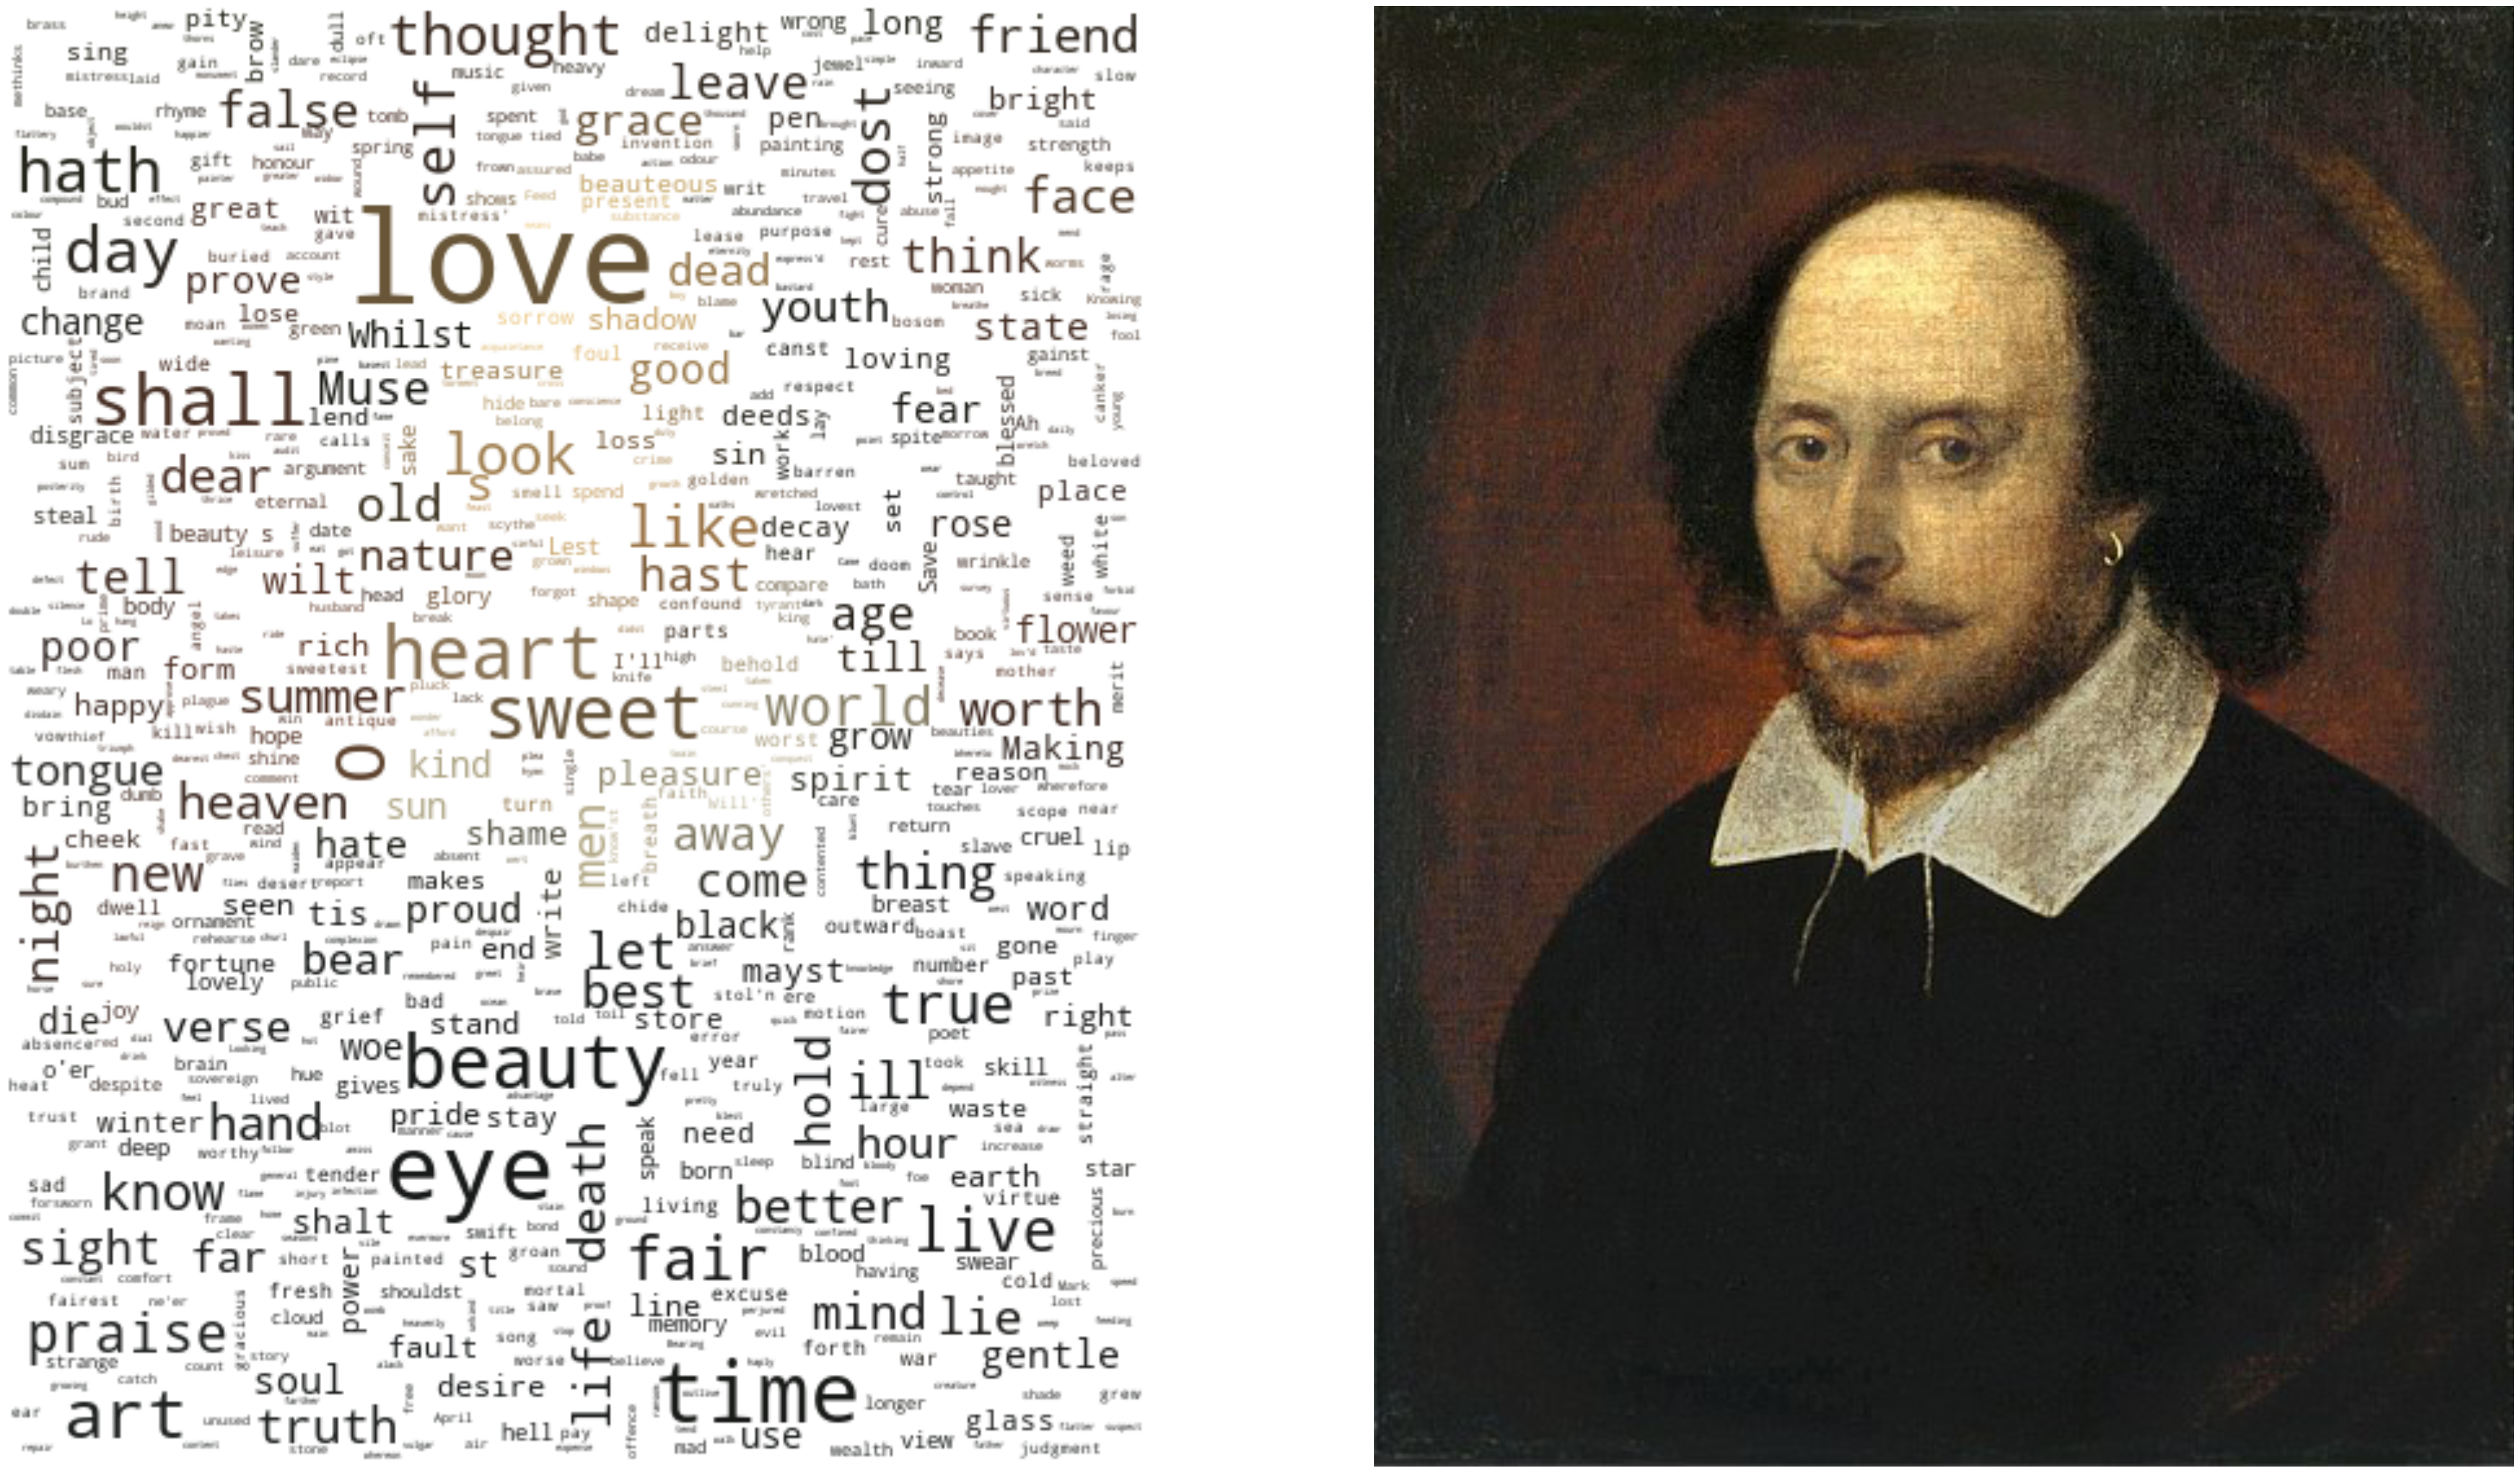

In [16]:
# note that the text going in is not one sonnet from the data frame, but rather the compiled text of all of them
# one sonnet is not enough data to use for a word cloud, and you get more insight into Shakespeare's writing by looking at all of the sonnets together
cloudText = compiledText[0]
cloudImage = picsList[0]

coloring = np.array(Image.open(os.path.join(myPath, 'sonnet analysis', cloudImage)))

# we need to add some stopwords because of the older language that is not covered in the default stopwords dictionary
myStopwords = ['thy', 'thou', 'thee', 'thine', 'doth', 'will', 'thus', 'thyself']
stopwords = set(STOPWORDS)
# adds my stopwords and the default dictionary together
allStopwords = list(STOPWORDS) + myStopwords

imageColors = ImageColorGenerator(coloring)

# this is our wordcloud object with our preset parameters
shakespeare = WordCloud(background_color="white", max_words=2000, mask=coloring,
               stopwords=allStopwords, max_font_size=50, random_state=90, color_func=imageColors)

shakespeare.generate(cloudText)

fig, axes = plt.subplots(1, 2, figsize=(50,100), dpi=100)

# uses colors from the given image for the wordcloud
axes[1].imshow(coloring, cmap=plt.cm.gray, interpolation="bilinear")
axes[0].imshow(shakespeare, interpolation="bilinear")
for ax in axes:
    ax.set_axis_off()
plt.show()

#shakespeare.to_file(os.path.join(myPath, 'sonnet analysis', 'sonnet wc.png'))